## 1. Overview of the Two Data Sources
We combined two independent datasets that contain complementary information about vehicles:

- **EPA_Fuel_Economy_Data.csv**  
  Contains vehicle fuel efficiency, engine information, and environmental metrics.

- **Vehicle_Specs_and_MSRP.csv**  
  Contains detailed vehicle specifications and manufacturer suggested retail price (MSRP).

The goal is to analyze the relationship between **fuel economy** and **vehicle pricing**, and how specifications jointly influence MSRP.

## 2. Key Challenge: Model Name Mismatch
The two datasets use different naming conventions, including:

- capitalization differences  
- hyphens or spaces  
- special characters  
- inconsistent model spelling  

To merge correctly, we standardized the `make` and `model` fields.

## 3. Merge Strategy

We merged the two datasets using an **inner join** based on the shared keys:

- **make**
- **model**
- **year**



In [8]:
import re
import pandas as pd


epa_df = pd.read_csv("EPA_Fuel_Economy_Data.csv")
specs_df = pd.read_csv("Vehicle_Specs_and_MSRP.csv")

epa_models = set(epa_df['model'].unique())
specs_models = set(specs_df['Model'].unique())


import re

def clean_model(s):
    if isinstance(s, str):
        s = s.lower()
        s = s.replace('-', ' ')      
        s = re.sub(r'\s+', ' ', s)     
        s = re.sub(r'[^a-z0-9 ]', '', s) 
        return s.strip()
    return s

epa_df['model'] = epa_df['model'].apply(clean_model)
specs_df['Model'] = specs_df['Model'].apply(clean_model)

epa_df['make'] = epa_df['make'].apply(clean_model)
specs_df['Make'] = specs_df['Make'].apply(clean_model)


epa_df['make'] = epa_df['make'].str.lower()
epa_df['model'] = epa_df['model'].str.lower()


specs_df['Make'] = specs_df['Make'].str.lower()
specs_df['Model'] = specs_df['Model'].str.lower()

specs_df.rename(columns={
    'Make': 'make',
    'Model': 'model',
    'Year': 'year'
}, inplace=True)
unmatched = epa_models - specs_models

merged_df = pd.merge(
    epa_df,
    specs_df,
    on=['make', 'model', 'year'],
    how='inner'                    

)
merged_df = pd.merge(epa_df, specs_df, on=['make', 'model', 'year'], how='inner')

print(merged_df)




     city_mpg                        class  combination_mpg  cylinders  \
0          17  small sport utility vehicle               19        6.0   
1          13                   two seater               16       10.0   
2          13                   two seater               16       10.0   
3          13                   two seater               16       10.0   
4          13                   two seater               16       10.0   
..        ...                          ...              ...        ...   
248        17                  compact car               19        4.0   
249        17                  compact car               19        4.0   
250        17                  compact car               19        4.0   
251        17                  compact car               19        4.0   
252        17                  compact car               19        4.0   

     displacement drive fuel_type  highway_mpg    make                  model  \
0             3.5   awd       

In [9]:
merged_df.shape            


(253, 25)

In [10]:
merged_df.info()              


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_mpg           253 non-null    int64  
 1   class              253 non-null    object 
 2   combination_mpg    253 non-null    int64  
 3   cylinders          251 non-null    float64
 4   displacement       251 non-null    float64
 5   drive              253 non-null    object 
 6   fuel_type          253 non-null    object 
 7   highway_mpg        253 non-null    int64  
 8   make               253 non-null    object 
 9   model              253 non-null    object 
 10  transmission       253 non-null    object 
 11  year               253 non-null    int64  
 12  Engine Fuel Type   253 non-null    object 
 13  Engine HP          253 non-null    float64
 14  Engine Cylinders   251 non-null    float64
 15  Transmission Type  253 non-null    object 
 16  Driven_Wheels      253 non

In [11]:
             
merged_df.describe() 

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,253.000000,253.000000,251.000000,251.000000,253.000000,253.000000,253.000000,251.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,22.000000,24.905138,5.378486,2.871713,29.747036,2015.794466,287.905138,5.442231,3.415020,29.936759,22.011858,1472.383399,60133.754941
std,10.976888,10.100629,2.210017,1.284320,9.176793,1.075175,142.370684,2.283780,0.819947,9.405121,11.043378,980.197327,60224.787146
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000,66.000000,3.000000,2.000000,18.000000,11.000000,204.000000,12995.000000
25%,17.000000,19.000000,4.000000,2.000000,23.000000,2015.000000,184.000000,4.000000,3.000000,23.000000,16.000000,640.000000,22600.000000
50%,21.000000,24.000000,4.000000,2.500000,28.000000,2016.000000,268.000000,4.000000,4.000000,28.000000,21.000000,1439.000000,30195.000000
75%,26.000000,29.000000,6.000000,3.600000,35.000000,2017.000000,420.000000,6.000000,4.000000,36.000000,26.000000,1720.000000,62500.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2017.000000,610.000000,12.000000,4.000000,102.000000,126.000000,3105.000000,335600.000000


In [12]:
merged_df.drop_duplicates(inplace=True)
merged_df[['MSRP', 'Engine HP', 'combination_mpg']].isnull().sum()
merged_df.dropna(subset=['MSRP', 'combination_mpg', 'Engine HP'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df.shape

(230, 25)

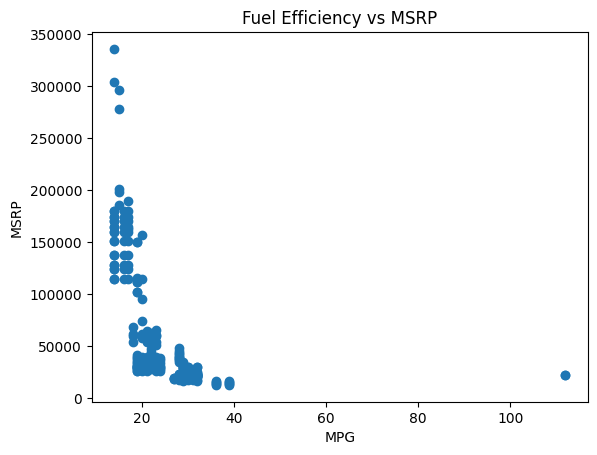

In [13]:
merged_df.isnull().sum()
merged_df.duplicated().sum()
merged_df.dtypes
merged_df[['MSRP', 'Engine HP', 'combination_mpg']].describe()
merged_df[['make', 'model', 'year']].nunique()
import matplotlib.pyplot as plt

plt.scatter(merged_df['combination_mpg'], merged_df['MSRP'])
plt.xlabel("MPG")
plt.ylabel("MSRP")
plt.title("Fuel Efficiency vs MSRP")
plt.show()



In [14]:
merged_df['make'].value_counts().head(10)


make
audi          55
hyundai       44
subaru        37
mazda         30
mitsubishi    12
acura         11
kia            9
nissan         8
porsche        6
cadillac       6
Name: count, dtype: int64

## Transformations and Interactions

In [15]:

import numpy as np
merged_df['log_msrp'] = np.log1p(merged_df['MSRP'])
merged_df['hp_x_mpg'] = merged_df['Engine HP'] * merged_df["combination_mpg"]
merged_df['hp_x_log_mpg'] =merged_df['Engine HP'] * np.log1p(merged_df['combination_mpg'])
merged_df['hp_per_cylinder'] = merged_df['Engine HP'] / merged_df['Engine Cylinders']
merged_df['mpg_diff'] = merged_df['highway_mpg'] - merged_df['city_mpg']






## variable selection

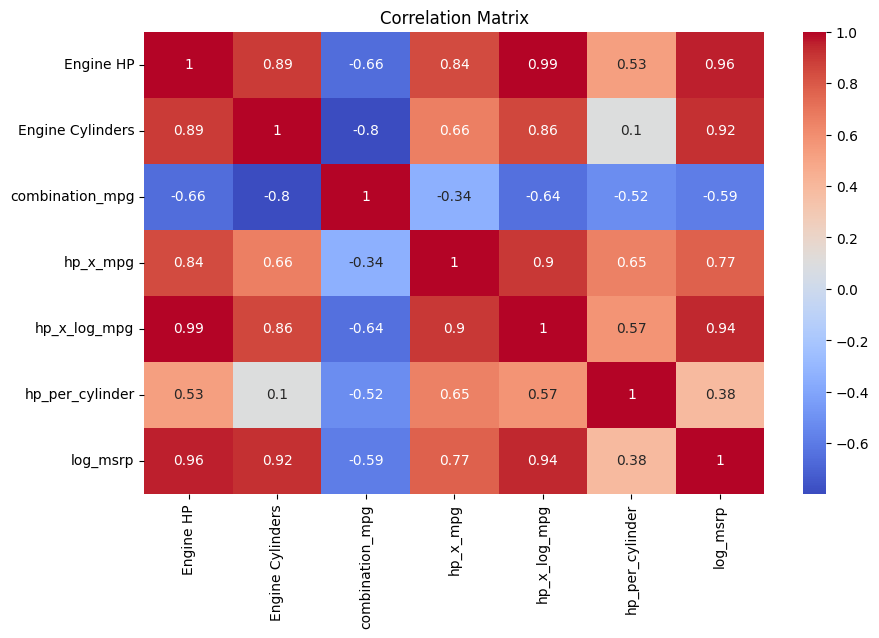

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged_df[[
    'Engine HP', 'Engine Cylinders', 'combination_mpg', 'hp_x_mpg',
    'hp_x_log_mpg', 'hp_per_cylinder', 'log_msrp'
]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = merged_df[['Engine HP', 'hp_x_log_mpg', 'combination_mpg', 'hp_x_mpg']]
X = X.dropna()

vif_df = pd.DataFrame()
vif_df['Variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


          Variable          VIF
0        Engine HP  3701.345861
1     hp_x_log_mpg  8496.411265
2  combination_mpg    26.080044
3         hp_x_mpg  1331.806660


In [18]:
merged_df.describe()


,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,log_msrp,hp_x_mpg,hp_x_log_mpg,hp_per_cylinder,mpg_diff
count,230.000000,230.000000,228.000000,228.000000,230.000000,230.000000,230.000000,228.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,228.000000,230.000000
mean,21.647826,24.539130,5.517544,2.985526,29.434783,2015.743478,298.578261,5.587719,3.426087,29.595652,21.634783,1486.143478,63821.108696,10.695101,6333.026087,914.172592,53.227522,7.786957
std,11.415624,10.476246,2.273124,1.291862,9.503969,1.105495,143.969400,2.347785,0.846889,9.704228,11.460454,1023.680001,61938.626208,0.814025,1667.159454,373.732503,13.609688,3.334719
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000,66.000000,3.000000,2.000000,18.000000,11.000000,204.000000,12995.000000,9.472397,2808.000000,281.651597,26.000000,-27.000000
25%,16.000000,19.000000,4.000000,2.000000,23.000000,2015.000000,184.000000,4.000000,3.000000,23.000000,16.000000,586.000000,23196.250000,10.051677,5520.000000,643.357391,46.000000,7.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2016.000000,268.000000,4.000000,4.000000,28.000000,20.000000,1439.000000,32195.000000,10.379598,6020.000000,844.423371,51.666667,8.000000
75%,26.000000,29.000000,6.000000,3.800000,35.000000,2017.000000,430.000000,6.500000,4.000000,36.000000,26.000000,2009.000000,100202.500000,11.514583,7310.000000,1213.242877,62.875000,9.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2017.000000,610.000000,12.000000,4.000000,102.000000,126.000000,3105.000000,335600.000000,12.723678,11400.000000,1797.439364,100.000000,11.000000


## overall EDA

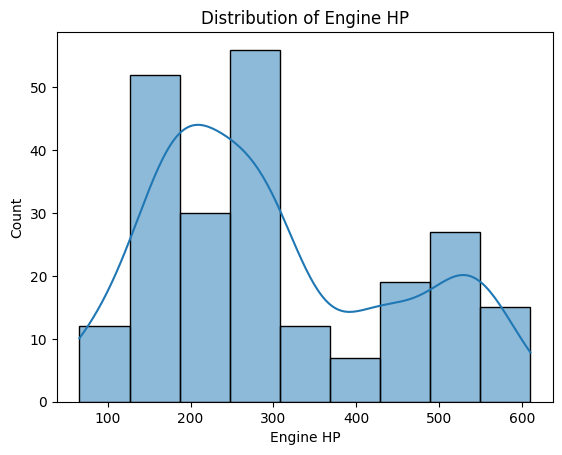

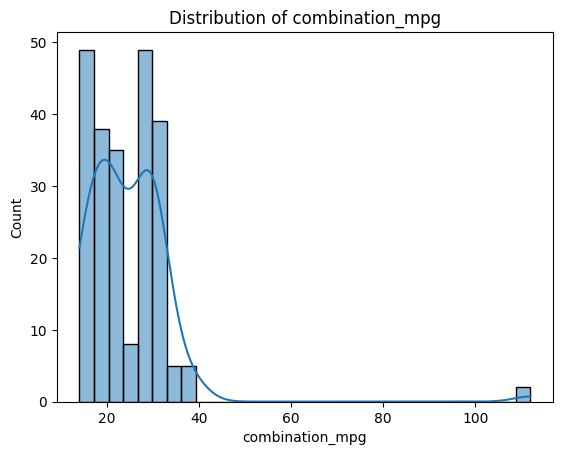

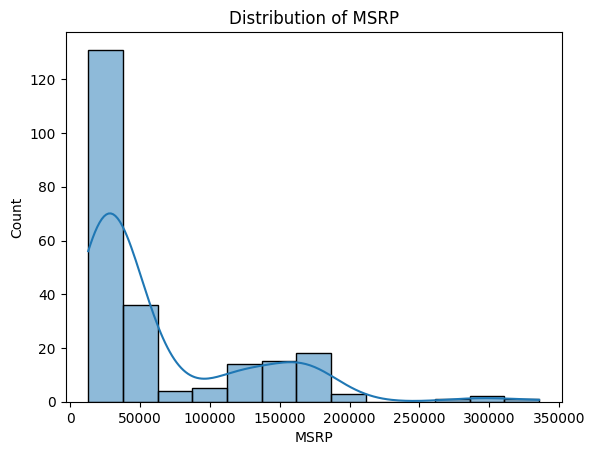

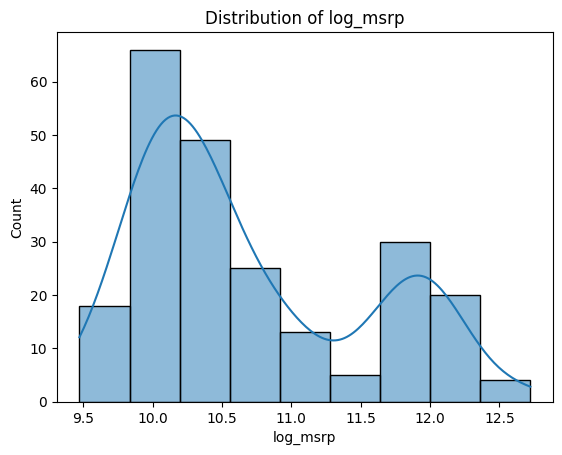

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Engine HP', 'combination_mpg', 'MSRP', 'log_msrp']:
    plt.figure()
    sns.histplot(merged_df[col], kde=True)
    plt.title(f"Distribution of {col}")


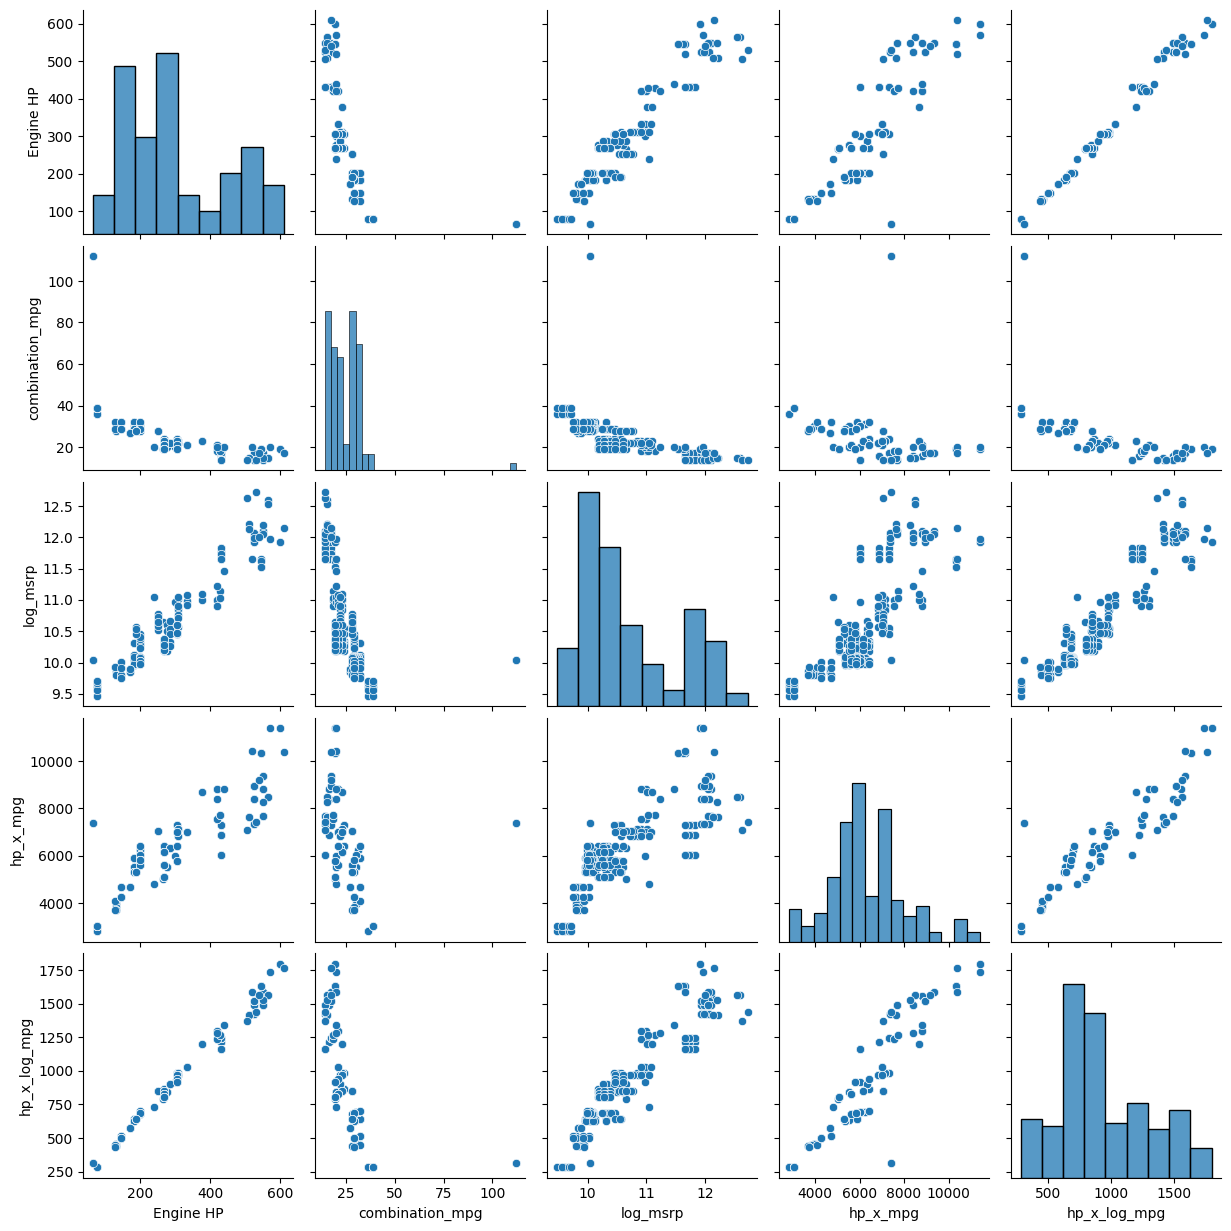

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['Engine HP', 'combination_mpg', 'log_msrp', 'hp_x_mpg', 'hp_x_log_mpg']
sns.pairplot(merged_df[selected_cols])
plt.show()


<Axes: ylabel='make'>

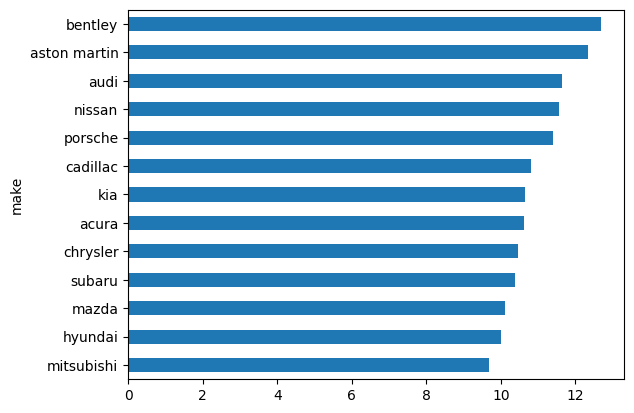

In [21]:
merged_df.groupby("make")["log_msrp"].mean().sort_values().plot(kind="barh")


## choosing an appropriate technique

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
features = ['combination_mpg', 'Engine HP', 'hp_x_mpg', 'hp_x_log_mpg']
target = 'log_msrp'

X = merged_df[features]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge RMSE:", rmse)

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
print("\nRidge Coefficients:")
print(coef_df)

Ridge RMSE: 0.20984303067697632

Ridge Coefficients:
           Feature  Coefficient
0  combination_mpg    -0.012506
1        Engine HP     0.028647
2         hp_x_mpg     0.000473
3     hp_x_log_mpg    -0.011054


## understanding the assumptions of technique

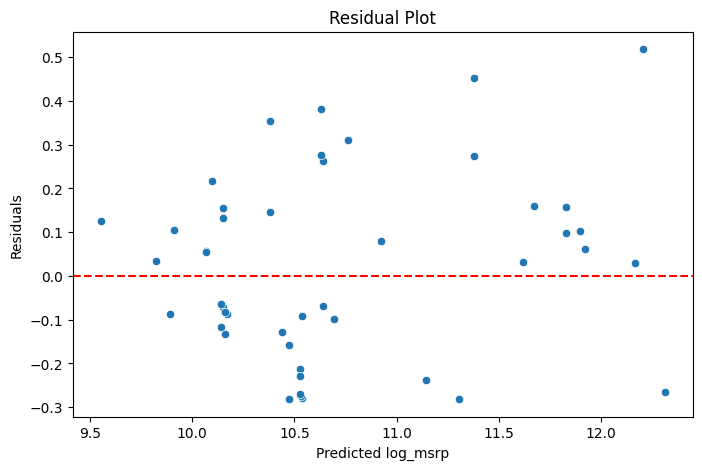

In [23]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted log_msrp')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


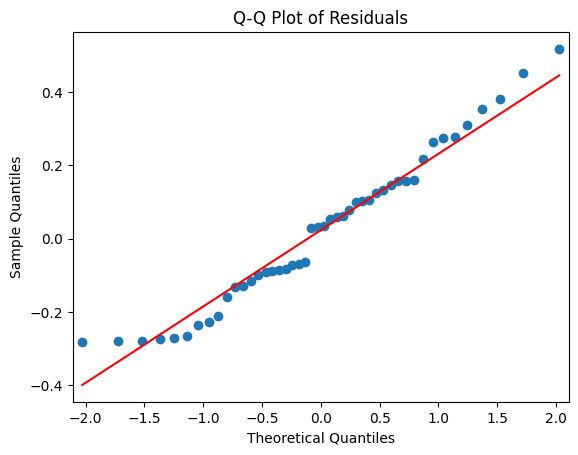

In [24]:
from sklearn.linear_model import Ridge
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


## fitting a model and evaluating the model

In [25]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(X_train, y_train)
print(ridge.coef_)
print(ridge.intercept_)
print(ridge.alpha_)
y_pred = ridge.predict(X_test)



[-0.01221264  0.0284205   0.00046603 -0.01093589]
9.55027592914674
10.0


In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01)
}

for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(name, "RMSE:", rmse)


OLS RMSE: 0.2098344716092901
Ridge RMSE: 0.20984303067697632
Lasso RMSE: 0.22002154643479946


/Users/luyi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.569e+00, tolerance: 1.239e-02
  model = cd_fast.enet_coordinate_descent(


In [30]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Mean CV RMSE:", rmse_scores.mean())
print("CV RMSE Std:", rmse_scores.std())


Mean CV RMSE: 0.19593391210085412
CV RMSE Std: 0.012420754354249898


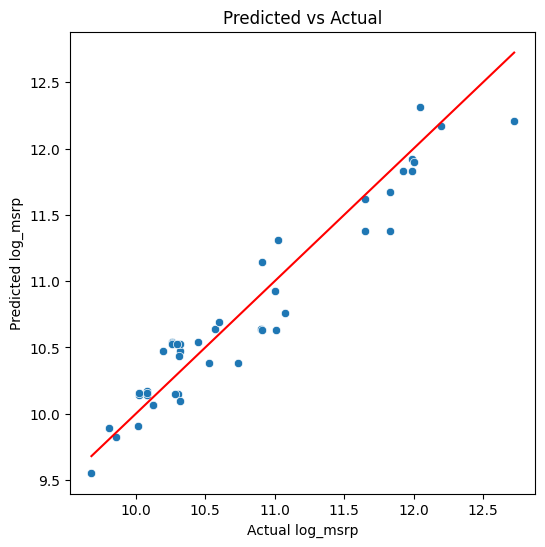

In [31]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual log_msrp")
plt.ylabel("Predicted log_msrp")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)



RMSE: 0.20992004989007995
MAE: 0.17607748739576076
R²: 0.9266397165652513


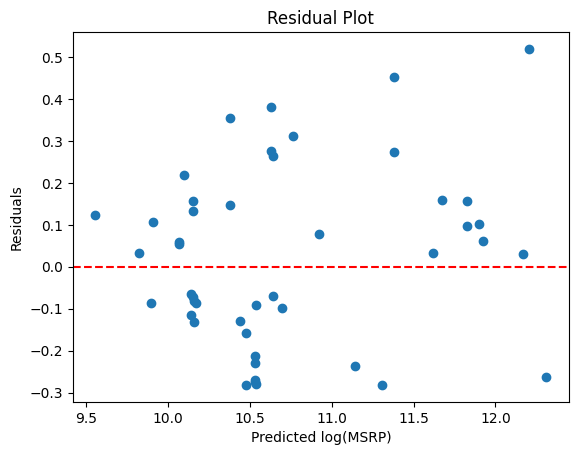

In [28]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log(MSRP)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [29]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               log_msrp   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     787.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.13e-112
Time:                        18:31:12   Log-Likelihood:                 44.174
No. Observations:                 184   AIC:                            -78.35
Df Residuals:                     179   BIC:                            -62.27
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5571      0.136     